# Classification supermarkets

## Libraries and settings

In [6]:
# Libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image

from sklearn import tree
from sklearn.metrics import RocCurveDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Show current working directory
print(os.getcwd())

# Show version of scikit-learn
import sklearn
sklearn.__version__

/workspaces/data_analytics/Submissions/Week_09


'1.3.0'

## Import supermarkets data

In [20]:
# Read and select variables
df_supermarkets_orig = pd.read_csv("supermarkets_data_enriched.csv", sep=",", encoding="utf-8")

# Number of rows and columns
print(df_supermarkets_orig.shape)

# First records
df_supermarkets_orig.head(5)

df_supermarkets = df_supermarkets_orig[['id', 'bfs_name', 'bfs_number', 'lat', 'lon', 'brand', 'pop', 'pop_dens', 'frg_pct', 'emp']]
df_supermarkets.head(5)


(3242, 18)


,id,bfs_name,bfs_number,lat,lon,brand,pop,pop_dens,frg_pct,emp
0,33126515,Schänis,3315,47.155616,9.037915,Spar,3876,97.142857,13.054696,1408.0
1,280130028,Schänis,3315,47.155492,9.039666,ALDI,3876,97.142857,13.054696,1408.0
2,6122906632,Schänis,3315,47.158959,9.044477,Denner,3876,97.142857,13.054696,1408.0
3,9019298862,Schänis,3315,47.155185,9.038472,Lidl,3876,97.142857,13.054696,1408.0
4,36726161,Uznach,3339,47.226191,8.980329,Migros,6489,860.610080,27.862537,3500.0


## Count and remove missing values, make sub df

In [21]:
# Count missing values
print(df_supermarkets.isna().sum())

# Remove missing values
df_supermarkets = df_supermarkets.dropna(subset=['id', 'bfs_name', 'bfs_number', 'lat', 'lon', 'brand', 'pop', 'pop_dens', 'frg_pct', 'emp'])

# Migros & Volg subset
df_sub = df_supermarkets.loc[df_supermarkets['brand'].isin(['Migros', 'Volg'])]
df_sub.head(10)

id               0
bfs_name         0
bfs_number       0
lat              0
lon              0
brand         1233
pop              0
pop_dens         0
frg_pct          0
emp             45
dtype: int64


,id,bfs_name,bfs_number,lat,lon,brand,pop,pop_dens,frg_pct,emp
4,36726161,Uznach,3339,47.226191,8.980329,Migros,6489,860.610080,27.862537,3500.0
8,48932835,Zürich,261,47.375020,8.522895,Migros,420217,4778.994655,32.458468,491193.0
11,83330862,Zürich,261,47.344749,8.529981,Migros,420217,4778.994655,32.458468,491193.0
12,119249170,Zürich,261,47.375255,8.536107,Migros,420217,4778.994655,32.458468,491193.0
15,262400822,Zürich,261,47.364072,8.530945,Migros,420217,4778.994655,32.458468,491193.0
20,267346993,Zürich,261,47.385598,8.531471,Migros,420217,4778.994655,32.458468,491193.0
24,270958272,Zürich,261,47.358367,8.554074,Migros,420217,4778.994655,32.458468,491193.0
25,271028298,Zürich,261,47.365678,8.548041,Migros,420217,4778.994655,32.458468,491193.0
27,271029206,Zürich,261,47.364596,8.553846,Migros,420217,4778.994655,32.458468,491193.0
29,273942728,Zürich,261,47.357610,8.571369,Migros,420217,4778.994655,32.458468,491193.0


## Classification Tree
For details see: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

### Create train and test samples (train = 80%, test = 20% of the data)

In [26]:
# Create train and test samples
X_train, X_test, y_train, y_test = train_test_split(df_sub[['bfs_number', 'lat', 'lon', 'pop', 'pop_dens', 'frg_pct', 'emp']], 
                                                    df_sub['brand'], 
                                                    test_size=0.50, 
                                                    random_state=42)

# Show X_train
print('X_train:')
print(X_train.head(), '\n')

# Show y_train
print('y_train:')
print(y_train.head())

X_train:
      bfs_number        lat       lon     pop     pop_dens    frg_pct  \
293         2701  47.543553  7.592179  173232  7263.396226  37.955459   
2568        1098  47.088382  8.112992    7046   155.712707   9.466364   
1175        1707  47.141312  8.428719   10990   739.569314  26.669700   
1436        2401  47.318050  7.801760    3793   545.755396  31.953599   
57           261  47.393708  8.529246  420217  4778.994655  32.458468   

           emp  
293   185432.0  
2568    3100.0  
1175   13035.0  
1436    3713.0  
57    491193.0   

y_train:
293     Migros
2568    Migros
1175    Migros
1436    Migros
57      Migros
Name: brand, dtype: object


### Fit the classification tree model and make predictions

In [31]:
# Initialize the classification tree model 
clf = DecisionTreeClassifier(random_state=20, 
                             max_depth=3)

# Train the classification tree model 
clf = clf.fit(X_train, y_train)

# Make model predictions
y_pred = clf.predict(X_test)
y_pred

array(['Migros', 'Migros', 'Migros', 'Migros', 'Migros', 'Migros',
       'Migros', 'Migros', 'Volg', 'Migros', 'Volg', 'Migros', 'Migros',
       'Migros', 'Migros', 'Volg', 'Volg', 'Migros', 'Volg', 'Migros',
       'Volg', 'Migros', 'Volg', 'Migros', 'Migros', 'Volg', 'Volg',
       'Migros', 'Volg', 'Migros', 'Migros', 'Volg', 'Migros', 'Migros',
       'Migros', 'Migros', 'Migros', 'Migros', 'Migros', 'Migros',
       'Migros', 'Migros', 'Volg', 'Volg', 'Volg', 'Migros', 'Volg',
       'Migros', 'Migros', 'Migros', 'Migros', 'Migros', 'Migros',
       'Migros', 'Migros', 'Migros', 'Volg', 'Migros', 'Volg', 'Volg',
       'Migros', 'Migros', 'Migros', 'Migros', 'Migros', 'Volg', 'Migros',
       'Migros', 'Migros', 'Migros', 'Migros', 'Migros', 'Volg', 'Migros',
       'Migros', 'Volg', 'Migros', 'Migros', 'Migros', 'Migros', 'Volg',
       'Migros', 'Volg', 'Migros', 'Migros', 'Migros', 'Migros', 'Migros',
       'Migros', 'Migros', 'Migros', 'Volg', 'Migros', 'Migros', 'Migros',


### Show confusion matrix and classification report

In [32]:
# Confusion matrix
print('Confusion matrix')
print(confusion_matrix(y_test, y_pred), '\n')

# Classification report
print('Classification report')
print(classification_report(y_test, y_pred))

Confusion matrix
[[230  16]
 [ 37  65]] 

Classification report
              precision    recall  f1-score   support

      Migros       0.86      0.93      0.90       246
        Volg       0.80      0.64      0.71       102

    accuracy                           0.85       348
   macro avg       0.83      0.79      0.80       348
weighted avg       0.84      0.85      0.84       348



### Print text representation of the classification tree

In [33]:
# Text representation of the classification tree
text_rep = tree.export_text(clf, 
                            feature_names=list(X_train.columns))

# Print text_representation
print(text_rep)

|--- emp <= 1399.00
|   |--- pop <= 3661.00
|   |   |--- lon <= 7.13
|   |   |   |--- class: Migros
|   |   |--- lon >  7.13
|   |   |   |--- class: Volg
|   |--- pop >  3661.00
|   |   |--- bfs_number <= 131.00
|   |   |   |--- class: Volg
|   |   |--- bfs_number >  131.00
|   |   |   |--- class: Migros
|--- emp >  1399.00
|   |--- pop_dens <= 30.11
|   |   |--- class: Volg
|   |--- pop_dens >  30.11
|   |   |--- emp <= 2531.00
|   |   |   |--- class: Migros
|   |   |--- emp >  2531.00
|   |   |   |--- class: Migros



## Visualize the classification tree

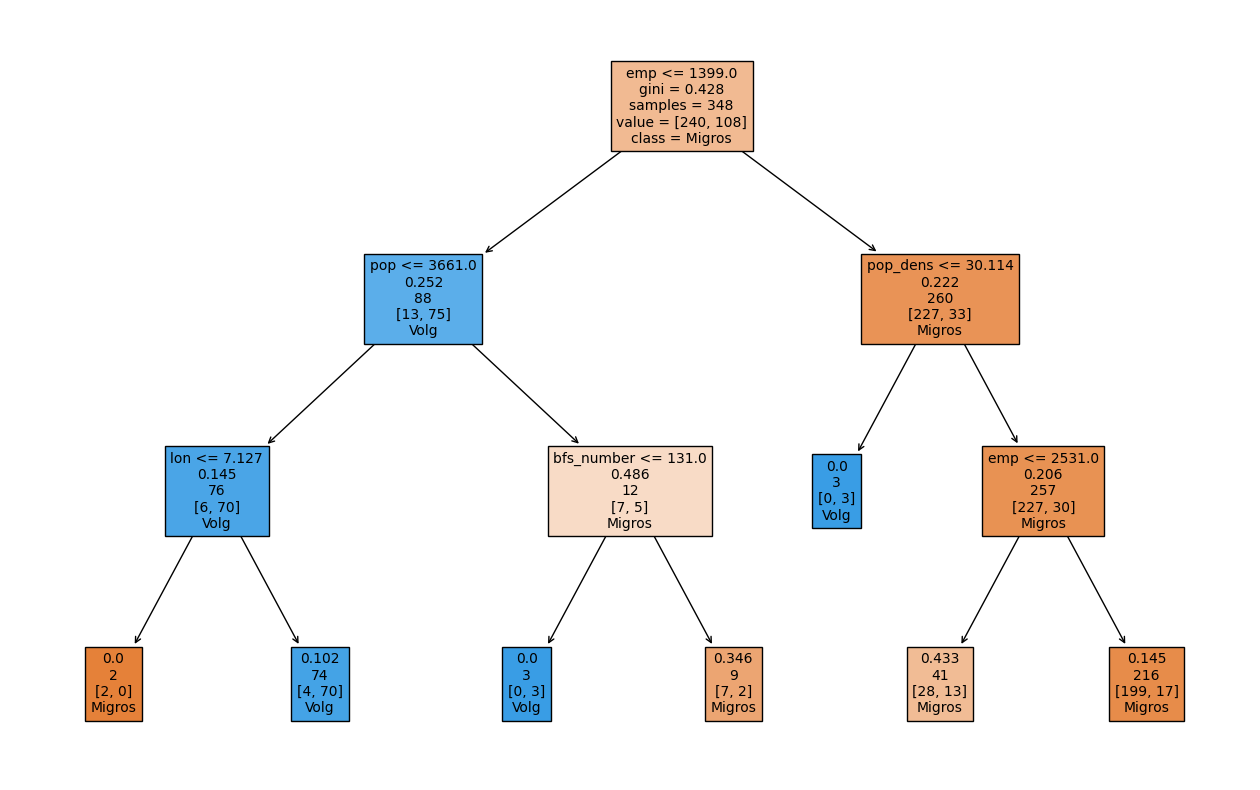

In [35]:
# For the meaning of numbers in boxes see root node
fig = plt.figure(figsize=(16,10))
tree_plot = tree.plot_tree(clf, 
                   feature_names=list(X_train.columns),  
                   class_names=['Migros', 'Volg'],
                   filled=True,
                   fontsize=10,
                   label='root')

## Random Forest Classifier
For details see: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

### Create train and test samples (train = 80%, test = 20% of the data)

In [37]:
# Create train and test samples
X2_train, X2_test, y2_train, y2_test = train_test_split(df_sub[['bfs_number', 'lat', 'lon', 'pop', 'pop_dens', 'frg_pct', 'emp']], 
                                                    df_sub['brand'], 
                                                    test_size=0.50, 
                                                    random_state=42)

# Show X2_train
print('X2_train:')
print(X2_train.head(), '\n')

# Show y2_train
print('y2_train:')
print(y2_train.head())

X2_train:
      bfs_number        lat       lon     pop     pop_dens    frg_pct  \
293         2701  47.543553  7.592179  173232  7263.396226  37.955459   
2568        1098  47.088382  8.112992    7046   155.712707   9.466364   
1175        1707  47.141312  8.428719   10990   739.569314  26.669700   
1436        2401  47.318050  7.801760    3793   545.755396  31.953599   
57           261  47.393708  8.529246  420217  4778.994655  32.458468   

           emp  
293   185432.0  
2568    3100.0  
1175   13035.0  
1436    3713.0  
57    491193.0   

y2_train:
293     Migros
2568    Migros
1175    Migros
1436    Migros
57      Migros
Name: brand, dtype: object


### Fit the Random Forest Classifier

In [38]:
# Initialize the random forest classifier
rfc = RandomForestClassifier(random_state=20, max_depth=10)

# Train the random forest classifier
rfc = rfc.fit(X2_train, y2_train)

# Predict the target variable (0 = not survived, 1 = survived)
y_pred_rf = rfc.predict(X2_test)

print('Predicted target variable (0 = not survived, 1 = survived)')
y_pred_rf

Predicted target variable (0 = not survived, 1 = survived)


array(['Migros', 'Migros', 'Migros', 'Migros', 'Volg', 'Migros', 'Volg',
       'Migros', 'Volg', 'Migros', 'Volg', 'Migros', 'Migros', 'Migros',
       'Migros', 'Volg', 'Volg', 'Volg', 'Volg', 'Volg', 'Volg', 'Migros',
       'Volg', 'Migros', 'Migros', 'Volg', 'Volg', 'Migros', 'Volg',
       'Migros', 'Migros', 'Volg', 'Migros', 'Migros', 'Migros', 'Migros',
       'Migros', 'Migros', 'Migros', 'Migros', 'Migros', 'Migros', 'Volg',
       'Volg', 'Volg', 'Migros', 'Volg', 'Volg', 'Migros', 'Migros',
       'Migros', 'Migros', 'Migros', 'Migros', 'Migros', 'Migros', 'Volg',
       'Migros', 'Volg', 'Volg', 'Migros', 'Migros', 'Migros', 'Migros',
       'Migros', 'Volg', 'Migros', 'Migros', 'Migros', 'Migros', 'Migros',
       'Migros', 'Volg', 'Migros', 'Migros', 'Volg', 'Migros', 'Migros',
       'Migros', 'Volg', 'Volg', 'Migros', 'Volg', 'Migros', 'Migros',
       'Migros', 'Migros', 'Migros', 'Migros', 'Migros', 'Volg', 'Volg',
       'Migros', 'Migros', 'Migros', 'Migros', 'Mig

### Show confusion matrix and classification report

In [39]:
# Confusion matrix
print('Confusion matrix')
print(confusion_matrix(y2_test, y_pred_rf), '\n')

# Classification report
print('Classification report')
print(classification_report(y2_test, y_pred_rf))

Confusion matrix
[[219  27]
 [ 25  77]] 

Classification report
              precision    recall  f1-score   support

      Migros       0.90      0.89      0.89       246
        Volg       0.74      0.75      0.75       102

    accuracy                           0.85       348
   macro avg       0.82      0.82      0.82       348
weighted avg       0.85      0.85      0.85       348



### Show feature importance

Index(['emp', 'pop', 'frg_pct', 'pop_dens', 'lon', 'bfs_number', 'lat'], dtype='object')
[0.24235697 0.23394329 0.14233807 0.12508617 0.10352383 0.0847871
 0.06796456]


<Axes: ylabel='features'>

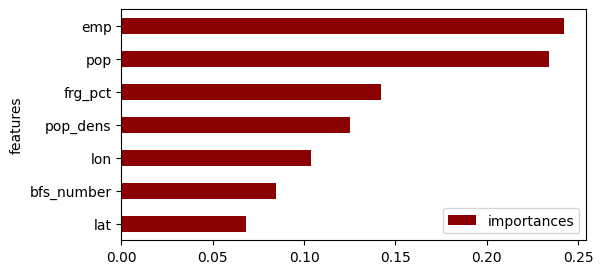

In [40]:
cols = X2_train.columns

# Derive feature importance from random forest
importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print col-names and importances-values
print( cols[indices] )
print( importances[indices] )

# Barplot with feature importance
df_fi = pd.DataFrame({'features':cols,'importances': importances})
df_fi.sort_values('importances', inplace=True)
df_fi.plot(kind='barh', 
           y='importances', 
           x='features', 
           color='darkred', 
           figsize=(6,3))

### ROC curve and AUC

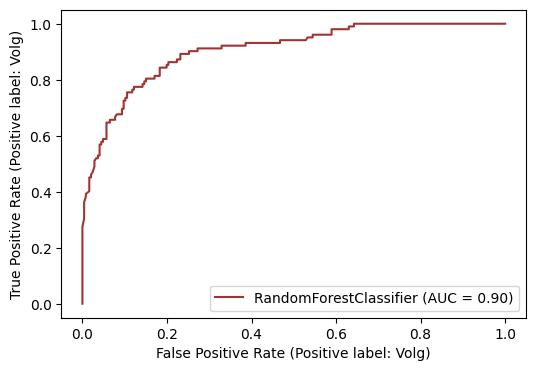

In [41]:
# Plot ROC curve and calculate AUC
plt.figure(figsize=(6,4))
ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(rfc, 
                                          X2_test, 
                                          y2_test, 
                                          ax=ax,
                                          alpha=0.8,
                                          c="darkred")
plt.show()

### Jupyter notebook --footer info-- (please always provide this at the end of each submitted notebook)

In [42]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Linux | 6.2.0-1015-azure
Datetime: 2023-11-14 19:48:40
Python Version: 3.10.13
-----------------------------------
